# **Exploratory Data Analysis (EDA)**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

# Get the Data

#**NumPy** is the fundamental library of **Python**, used to perform scientific computing. It provides high-performance **multidimensional arrays(metrices)** and tools to deal with them. .

#**Pandas** is an **open-source library** written in **Python** Language. Pandas provide high-performance, fast and data analysis tools for **manipulating numeric data and time series**. We can import data from various file formats like **JSON, SQL, Microsoft Excel,** etc.

## Download the Data

In [ ]:

import numpy as np

import pandas as pd

# Download the data using a .csv file link from -> https://github.com/ageron/handson-ml2
# Follow kaggle dataset -> https://www.kaggle.com/datasets/camnugent/california-housing-prices
link = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(link)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# **Check number of rows & columns in the dataset and also count the not null values**

In [ ]:
print("Shape of the data :", housing.shape)
# See all the columns in the dataset
print("All columns are :", list(housing.columns))

Shape of the data : (20640, 10)
All columns are : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [ ]:
# Check datatypes & count of not-null values in each field
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the `ocean_proximity` field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute.

In [ ]:
# value_counts() works on a column & it returns frequency of each class in descending order.
# We mainly use this to count occurances of categorical data or data having few unique values.
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
# describe() works on whole DataFrame (pandas dataset object) and prints importent staistical information
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observa- tions falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

# **Graph Plotting**

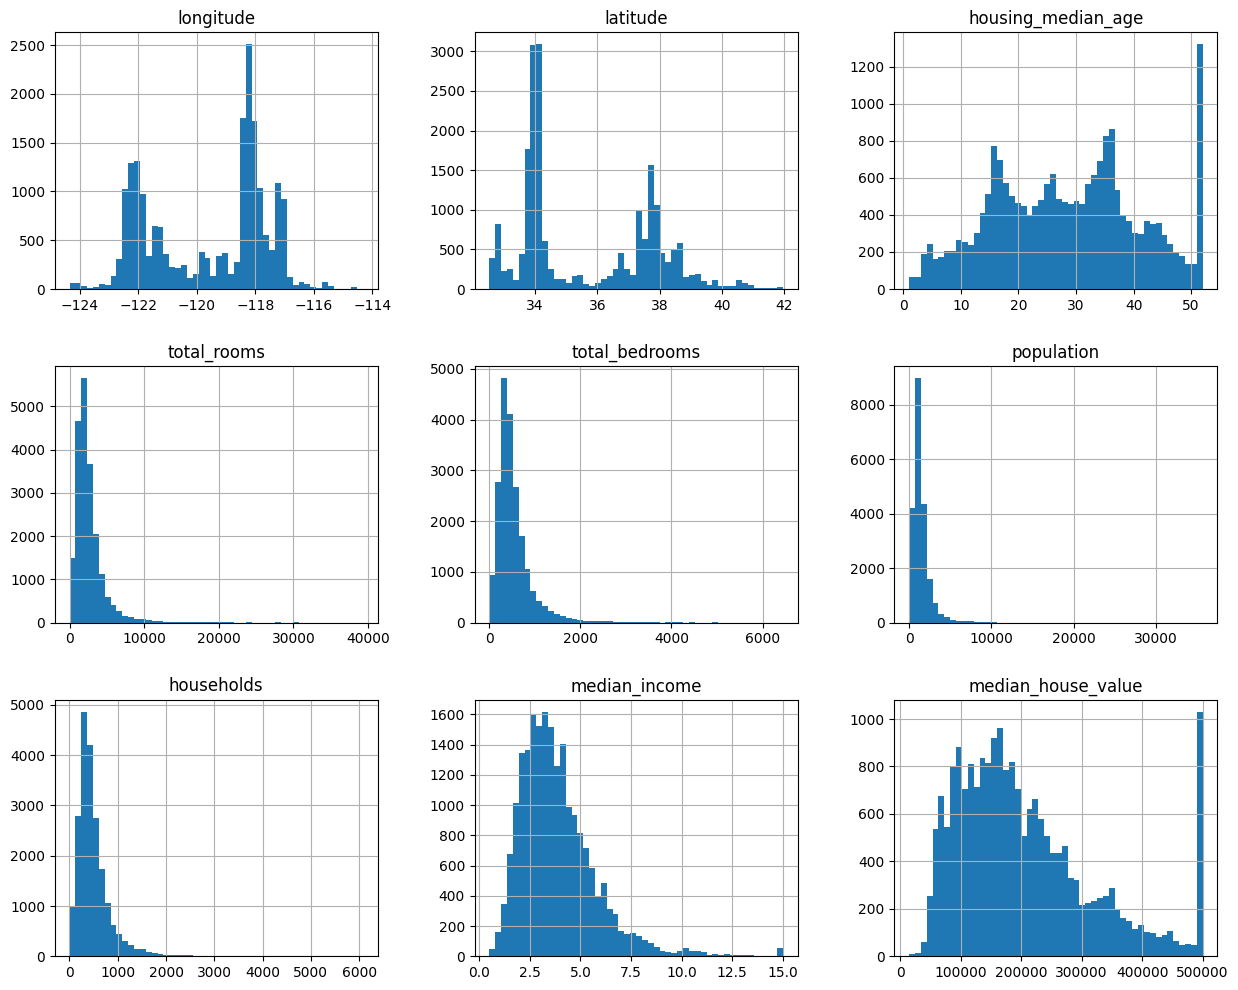

In [ ]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt

# DataFrame.hist() creates histogram of every feature present in the DataFrame.
housing.hist(bins=50, figsize=(15,12))
plt.show()

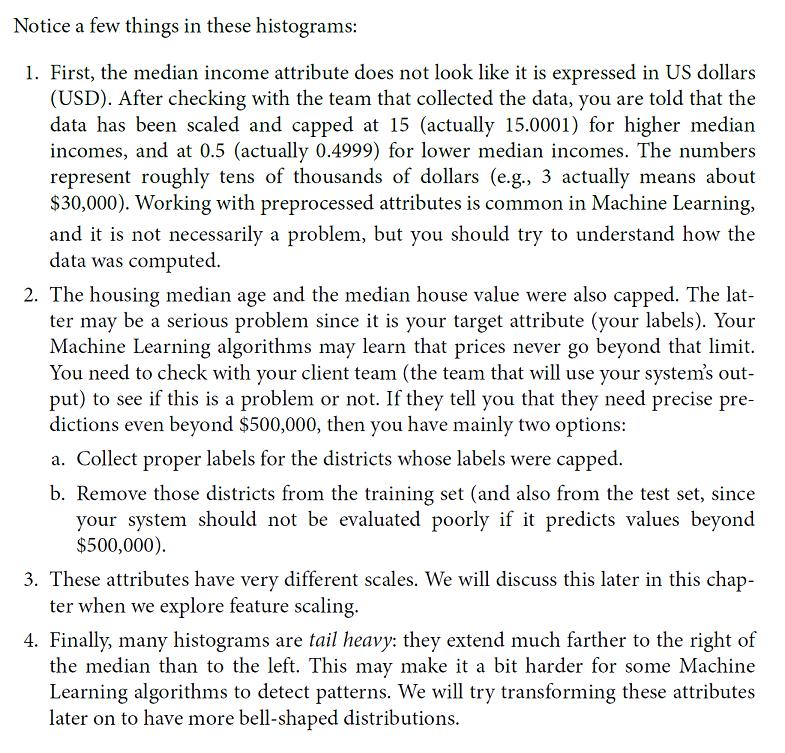

## Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split is a very common and standard function to split dataset into training & testing set
# Here test_size takes what fraction of dataset should be in test set.
# We can use shuffle=True to set random sample of the test set.
# setting random state ensure that the same split is produced every time, so model result will be not altered
train_set, test_set = train_test_split(housing, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
print("Size of training data :", train_set.shape)
print("Size of testing data :", test_set.shape)

Size of training data : (16512, 10)
Size of testing data : (4128, 10)


In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


In [ ]:
# Resetting the indiced of bothe training & testing set
# this command gives both sets a new, sequential index starting from 0.
train_set.reset_index(inplace=True)
test_set.reset_index(inplace=True)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16354 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4079 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   median_house_value  4128 non-null   float64
 10  ocean_proximity     4128 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 354.9+ KB


# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

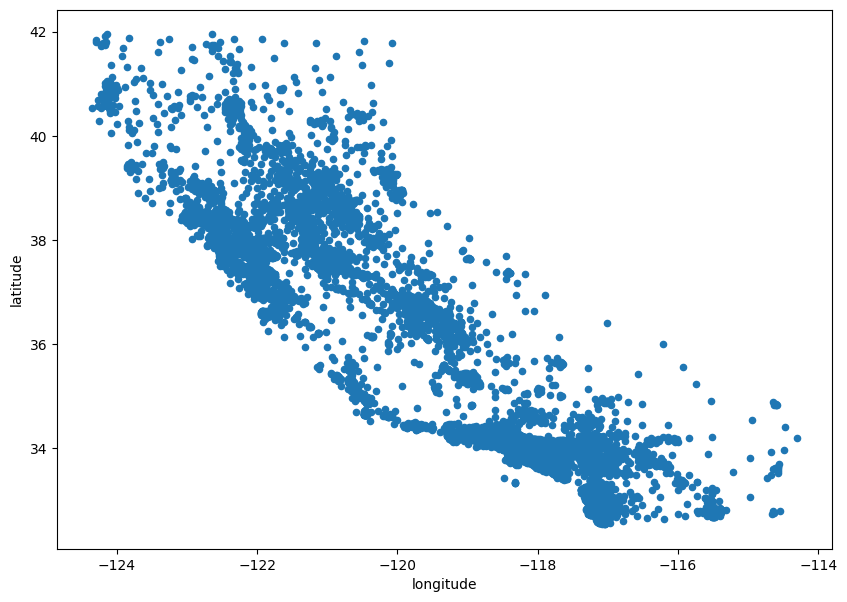

In [ ]:
# This plot is called scatter-plot, where we use a dot to represent each instance of the dataset.
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.show()

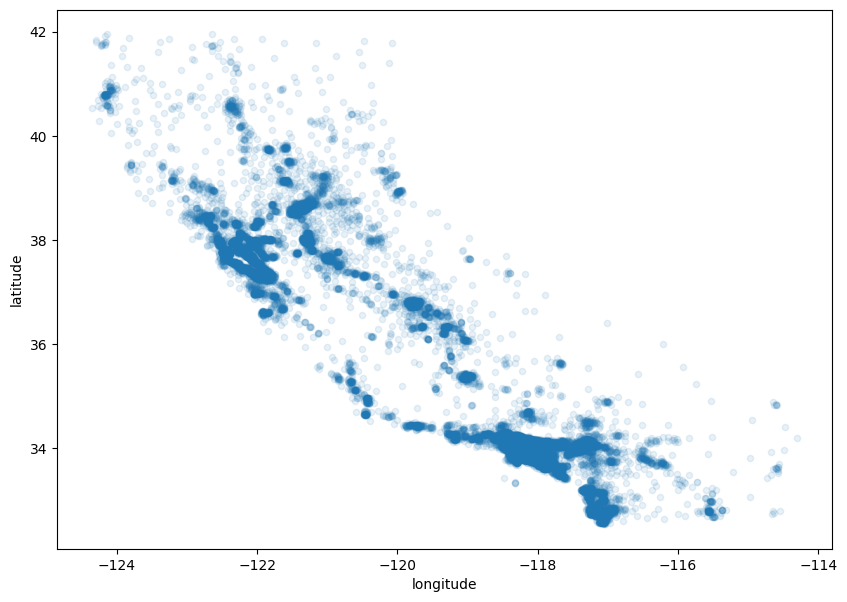

In [ ]:
# To check the density of dots, we bring down the opacity of the dots to 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.1)
plt.show()

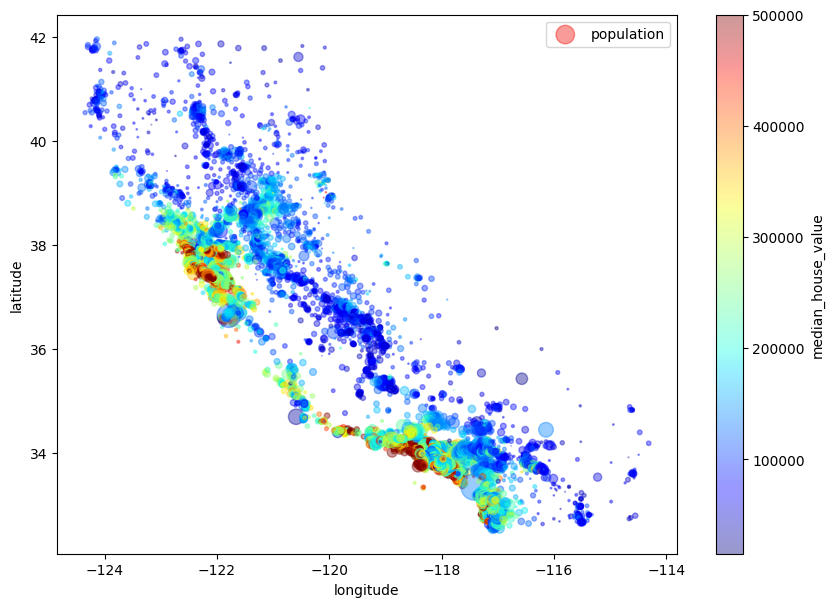

In [ ]:
# In this plot, the radious of each circle represents district's population & color represents price

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

In [ ]:
# To make it more understandable, lets overleap this plot on a real image of California state.

# skimage is from the image scikit-image
# To install scikit-image, use the command "pip install scikit-image"
# from skimage import io

# link = "https://github.com/ageron/handson-ml2/blob/master/images/end_to_end_project/california.png?raw=true"
# california_image = io.imread(link)
# plt.imshow(california_image)
# plt.show()

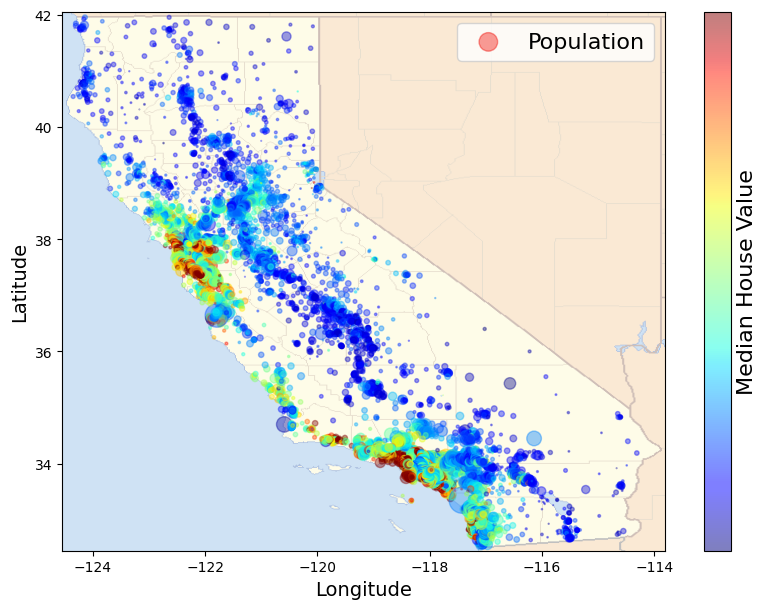

In [ ]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

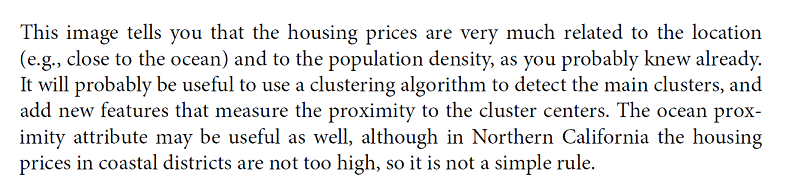

## Looking for Correlations

In [ ]:
# Here we are using Pearson correlation coefficient.
# corr() autometically calculates correlation for every pair of attributes
corr_matrix = housing.corr(numeric_only=True)
# The numeric_only parameter tells pandas to only include numerical columns

In [ ]:
# Lets see the most correlated features to "median_house_value"
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


We can visualize the correlation using the 2D plotting of every pair-wise feature.

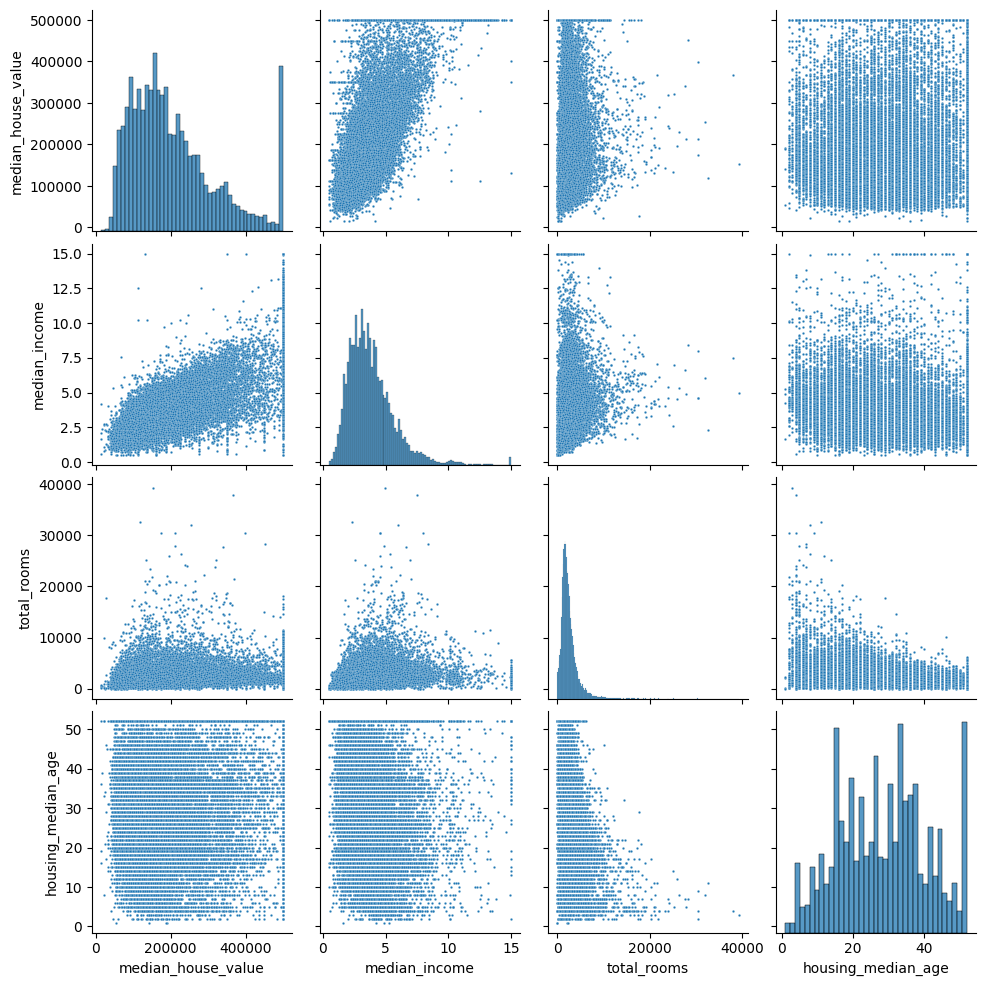

In [ ]:
 # Just like matplotlib, seaborn is also a data-visualization tool.
# Seaborn works upon matplotlib (seaborn is dependent on matplotlib)
# Seaborn can create some cool looking plots with lesser effort than matplotlib
import seaborn as sns

# pairplot() plots 2D scatterplot for every combinations of pair-wise features
# As we have 10 features, we will end up plotting 100 plots in a 10 x 10 grid.
# So we are plotting only those features having high correlation with "median_house_value"
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(housing[attributes], plot_kws={"s": 3})
plt.show()

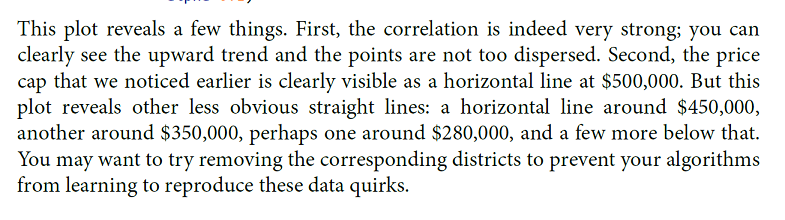

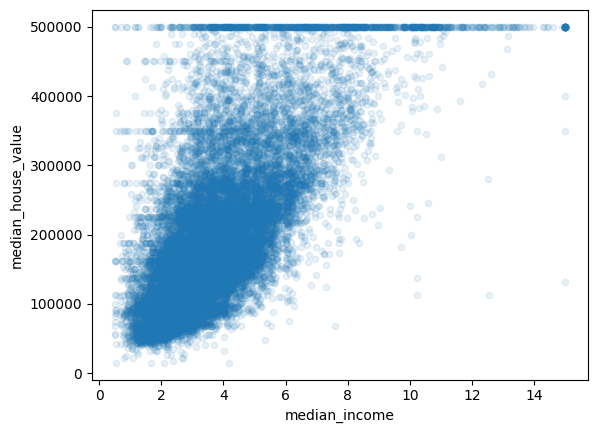

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

## Experimenting with Attribute Combinations

In [ ]:
# We can generate more feature by logically combining one or more features
# Like, (rooms in a single household) = (total no of rooms) / (no of households)

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
# Again calculate correlation for new features.

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


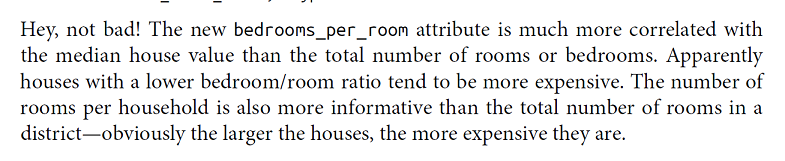

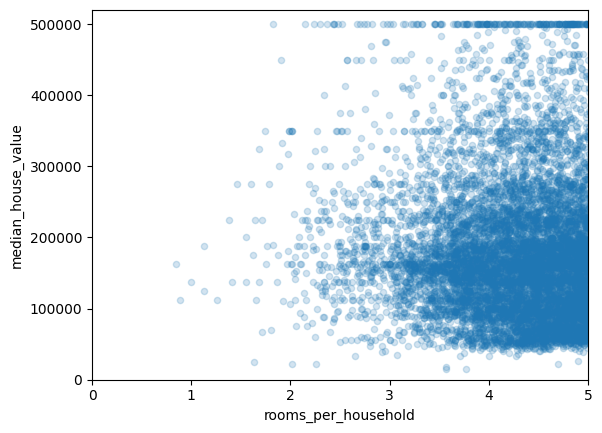

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [ ]:
# As our objective is to predict "median_house_value", we will treat it as label,
# and this "median_house_value" will not be a part of feature anymore.
# We are seperating the label from features.

train_features = train_set.drop("median_house_value", axis=1)   # Training feature
train_labels = train_set["median_house_value"].copy()           # Training label

## Data Cleaning

In the book 3 options are listed:

```python
# option 1 : Get rid of the corresponding districts
train_features.dropna(subset=["total_bedrooms"])

# option 2 : Get rid of the whole attribute.
train_features.drop("total_bedrooms", axis=1)

# option 3 : Set the values to some value (zero, the mean, the median, etc.).
median = train_features["total_bedrooms"].median()
train_features["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [ ]:
# First, seperate the rows having total_bedrooms = NaN
missing_rows = train_features[train_features.isnull().any(axis=1)]
missing_rows

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN


In [ ]:
# option 1 : Get rid of the corresponding districts

missing_rows.dropna(subset=["total_bedrooms"])

# It will not change the actual data.
# There are two ways to make a change permanent in pandas.
# Technique 1: Most of the function in pandas contains a parameter "inplace"
#              if we set inplace=True -> It will not retuen anything, but make change inplace.
#              by default inplace=False -> It will return the changes, but the changes are not permanent
# Technique 2: Store the return value in a new variable.
#              As by default inplace=False, so it will return the changes which will be saved in a new object

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# option 2 : Get rid of the whole attribute.
missing_rows.drop("total_bedrooms", axis=1)

,index,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,3161.0,1280.0,3.1106,<1H OCEAN


In [ ]:
# option 3 : Set the values to some value (zero, the mean, the median, etc.).

# Here we are first calculating median of rest of values in training set.
# Then replace the null values with median using fillna() function
median = train_features["total_bedrooms"].median()
missing_rows["total_bedrooms"].fillna(median, inplace=True)
# See, we are updating the input dataframe permanently by using "inplace=True"
missing_rows

<ipython-input-33-3f9b7e0acffc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows["total_bedrooms"].fillna(median, inplace=True)


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,434.0,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,434.0,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,434.0,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,434.0,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,434.0,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,434.0,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,434.0,3161.0,1280.0,3.1106,<1H OCEAN


## Handling Text and Categorical Attributes

Machine Learning models prefer to work only with numeric values. Now, in our dataset, `ocean_proximity` is a non-neumeric value, so first convert it into a neumeric value so that the ML model can utilize it while training. We seen earlier, `ocean_proximity` is a very useful feature in our dataset.

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
cat_feature = train_features[["ocean_proximity"]]
cat_feature.head(10)

,ocean_proximity
0,INLAND
1,NEAR BAY
2,<1H OCEAN
3,<1H OCEAN
4,<1H OCEAN
5,<1H OCEAN
6,<1H OCEAN
7,NEAR OCEAN
8,INLAND
9,INLAND


In [ ]:
# Our goal is to map the categorical values into some numeric values.
# We can do this manually, but sklearn.preprocessing contains a simple function
# "OrdinalEncoder", which does the job for us.

from sklearn.preprocessing import OrdinalEncoder

# First create an object of "OrdinalEncoder" class
ordinal_encoder = OrdinalEncoder()
# Pass the data we want to convert into "fit_transform()" function
cat_feat_encoded = ordinal_encoder.fit_transform(cat_feature)
# Lets see the result
cat_feat_encoded[:10]

array([[1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [ ]:
# Here we can see in which order it has replaced the values,
# Here the values will be replaces by its index.

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We can interprate the output as

```
'<1H OCEAN'  -> 0
'INLAND'     -> 1
'ISLAND'     -> 2
'NEAR BAY'   -> 3
'NEAR OCEAN' -> 4
```

One problem with converting categorical values into neumerical value is, we are randomly assigning one unique number to each class or category, the number might be any number or in a sequential manner as "A" -> 1, "B" -> 2... But the ML model will interprete as numeric value and it will think higher value means good and lower value means bad, but it doesn't know that the higher value or lower value have nothing to do with actual categorical information.

To eliminate this biasing effect, after applying "OrdinalEncoding", we use a technique called "OneHotEncoding". What it does is, it converts each unique number into a vector of size `n`. Now,. at a time, only one of the values will be set to `1`, and all others will be = `0`. As only one value is active at a time, thats why it is calles one hot encoding. This technique eliminates the boasing effect.

In [ ]:
# Sklearn.preprocessing also contains "OneHotEncoder", which simply converts numeric values into one hot vector.
from sklearn.preprocessing import OneHotEncoder

# First create "OneHotEncoder" object
cat_encoder = OneHotEncoder(sparse=False)
# Pass the feature we want to convert into the "fit_transform" function
cat_1hot = cat_encoder.fit_transform(cat_feature)
cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## **Checking Outliers**

An outlier is a data point that significantly differs from the other data points in a dataset. Outliers can be unusually high or low values compared to the rest of the data. They are important to identify because they can have a large impact on statistical analyses and models.

Characteristics of Outliers
* Extreme Values: Outliers are data points that are much higher or lower than most of the other values in the dataset.
* Deviation from the Norm: They do not follow the general trend or pattern of the data.
* Impact on Analysis: Outliers can skew statistical measures such as mean and standard deviation, and can affect the results of regression analyses and other models.

Types of Outliers

* Univariate Outliers: These are outliers in a single variable. For example, in a dataset of people's heights, someone who is 8 feet tall would be a univariate outlier.
* Multivariate Outliers: These are outliers that occur in the context of multiple variables. For example, a combination of height and weight that is unusual compared to the general population.

Causes of Outliers

* Measurement Error: Errors in data collection or entry can produce outliers.
* Experimental Error: Mistakes in the experimental setup or procedure can lead to outliers.
* Data Processing Error: Errors in data processing, such as incorrect data transformation, can result in outliers.
* Natural Variation: Sometimes outliers occur naturally in data due to variability in the population.
* Data Sampling Error: Sampling from a population in a way that does not represent the entire population can produce outliers.

Identifying Outliers

Outliers can be identified using various statistical methods:

Visual Methods:
* Box Plot: A graphical representation that shows the distribution of data points. Outliers are typically represented as individual points outside the whiskers of the box plot.
* Scatter Plot: A plot of two variables that can highlight points that deviate from the overall pattern.
* Statistical Methods:
Interquartile Range (IQR): Outliers are often identified as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.
* Standard Deviation, Z-score.

Handling Outliers

* Remove: Outliers can be removed if they are believed to be errors or not representative of the population.


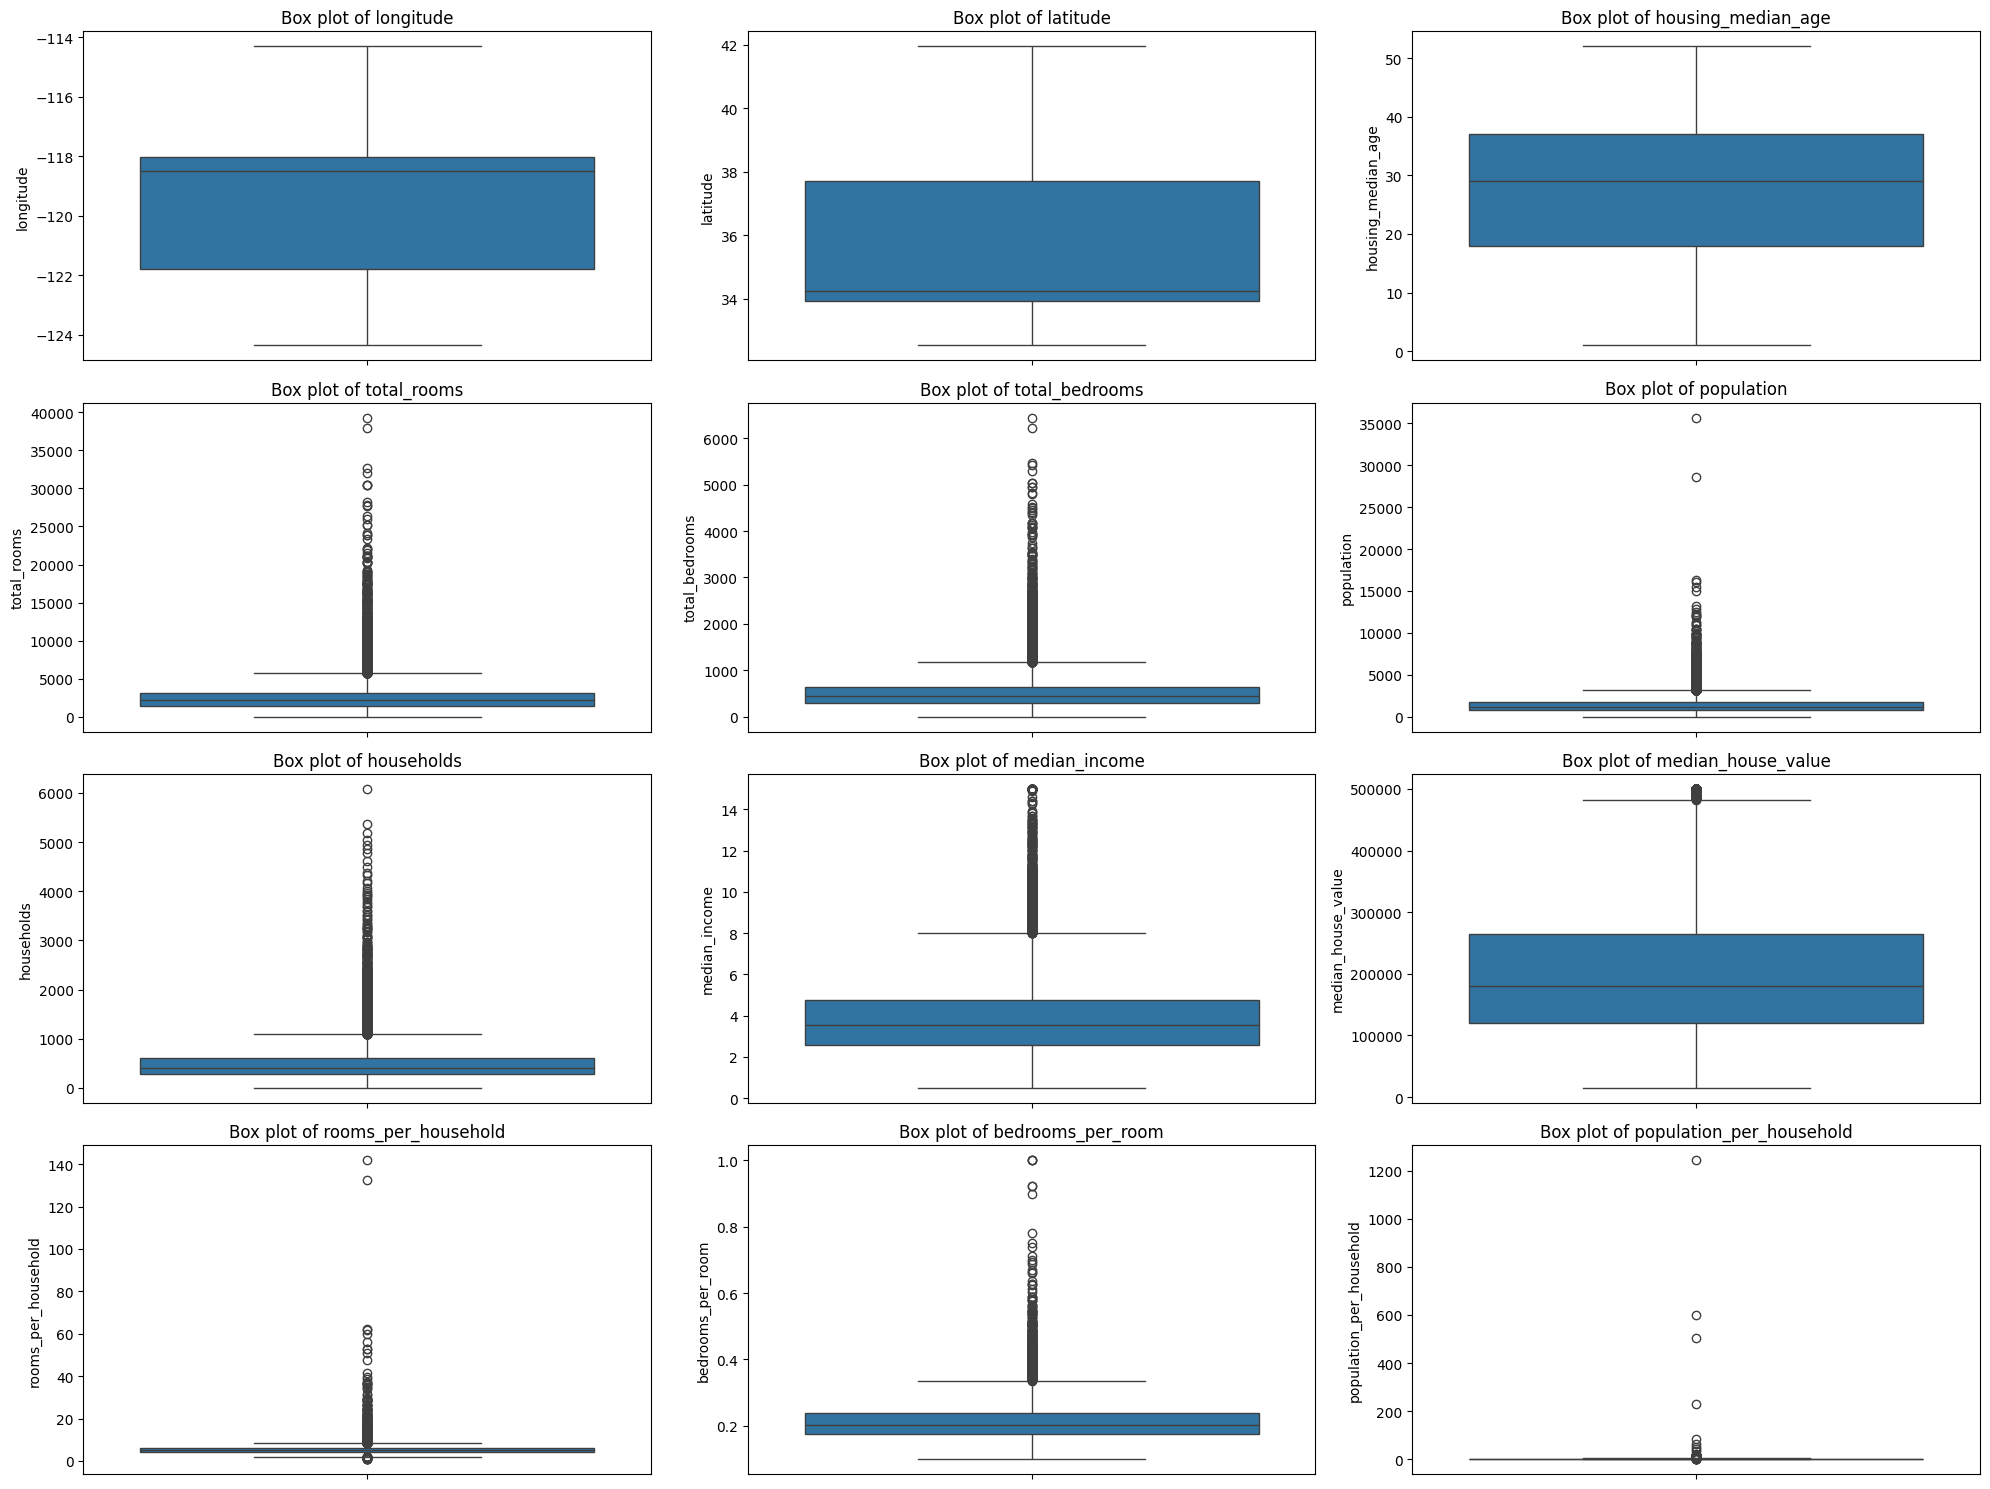

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers = pd.concat([outliers, df[outlier_condition]], axis=0)
    outliers = outliers.drop_duplicates()
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(housing)

# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(housing.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=housing, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

pandas for data manipulation.

numpy for numerical operations.

This function identifies outliers in the dataset using the Interquartile Range (IQR) method.

It iterates over all numerical columns in the DataFrame.

For each column, it calculates Q1 (25th percentile) and Q3 (75th percentile).

The IQR is computed as the difference between Q3 and Q1.

The lower and upper bounds are defined as (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR), respectively.


Rows with values outside these bounds are considered outliers and are concatenated into a new DataFrame named outliers.
Duplicate rows are dropped from the outliers DataFrame to ensure unique outliers.


# **Removing the outliers**

Original dataset size: (20640, 13)
Dataset size after removing outliers: (16177, 13)


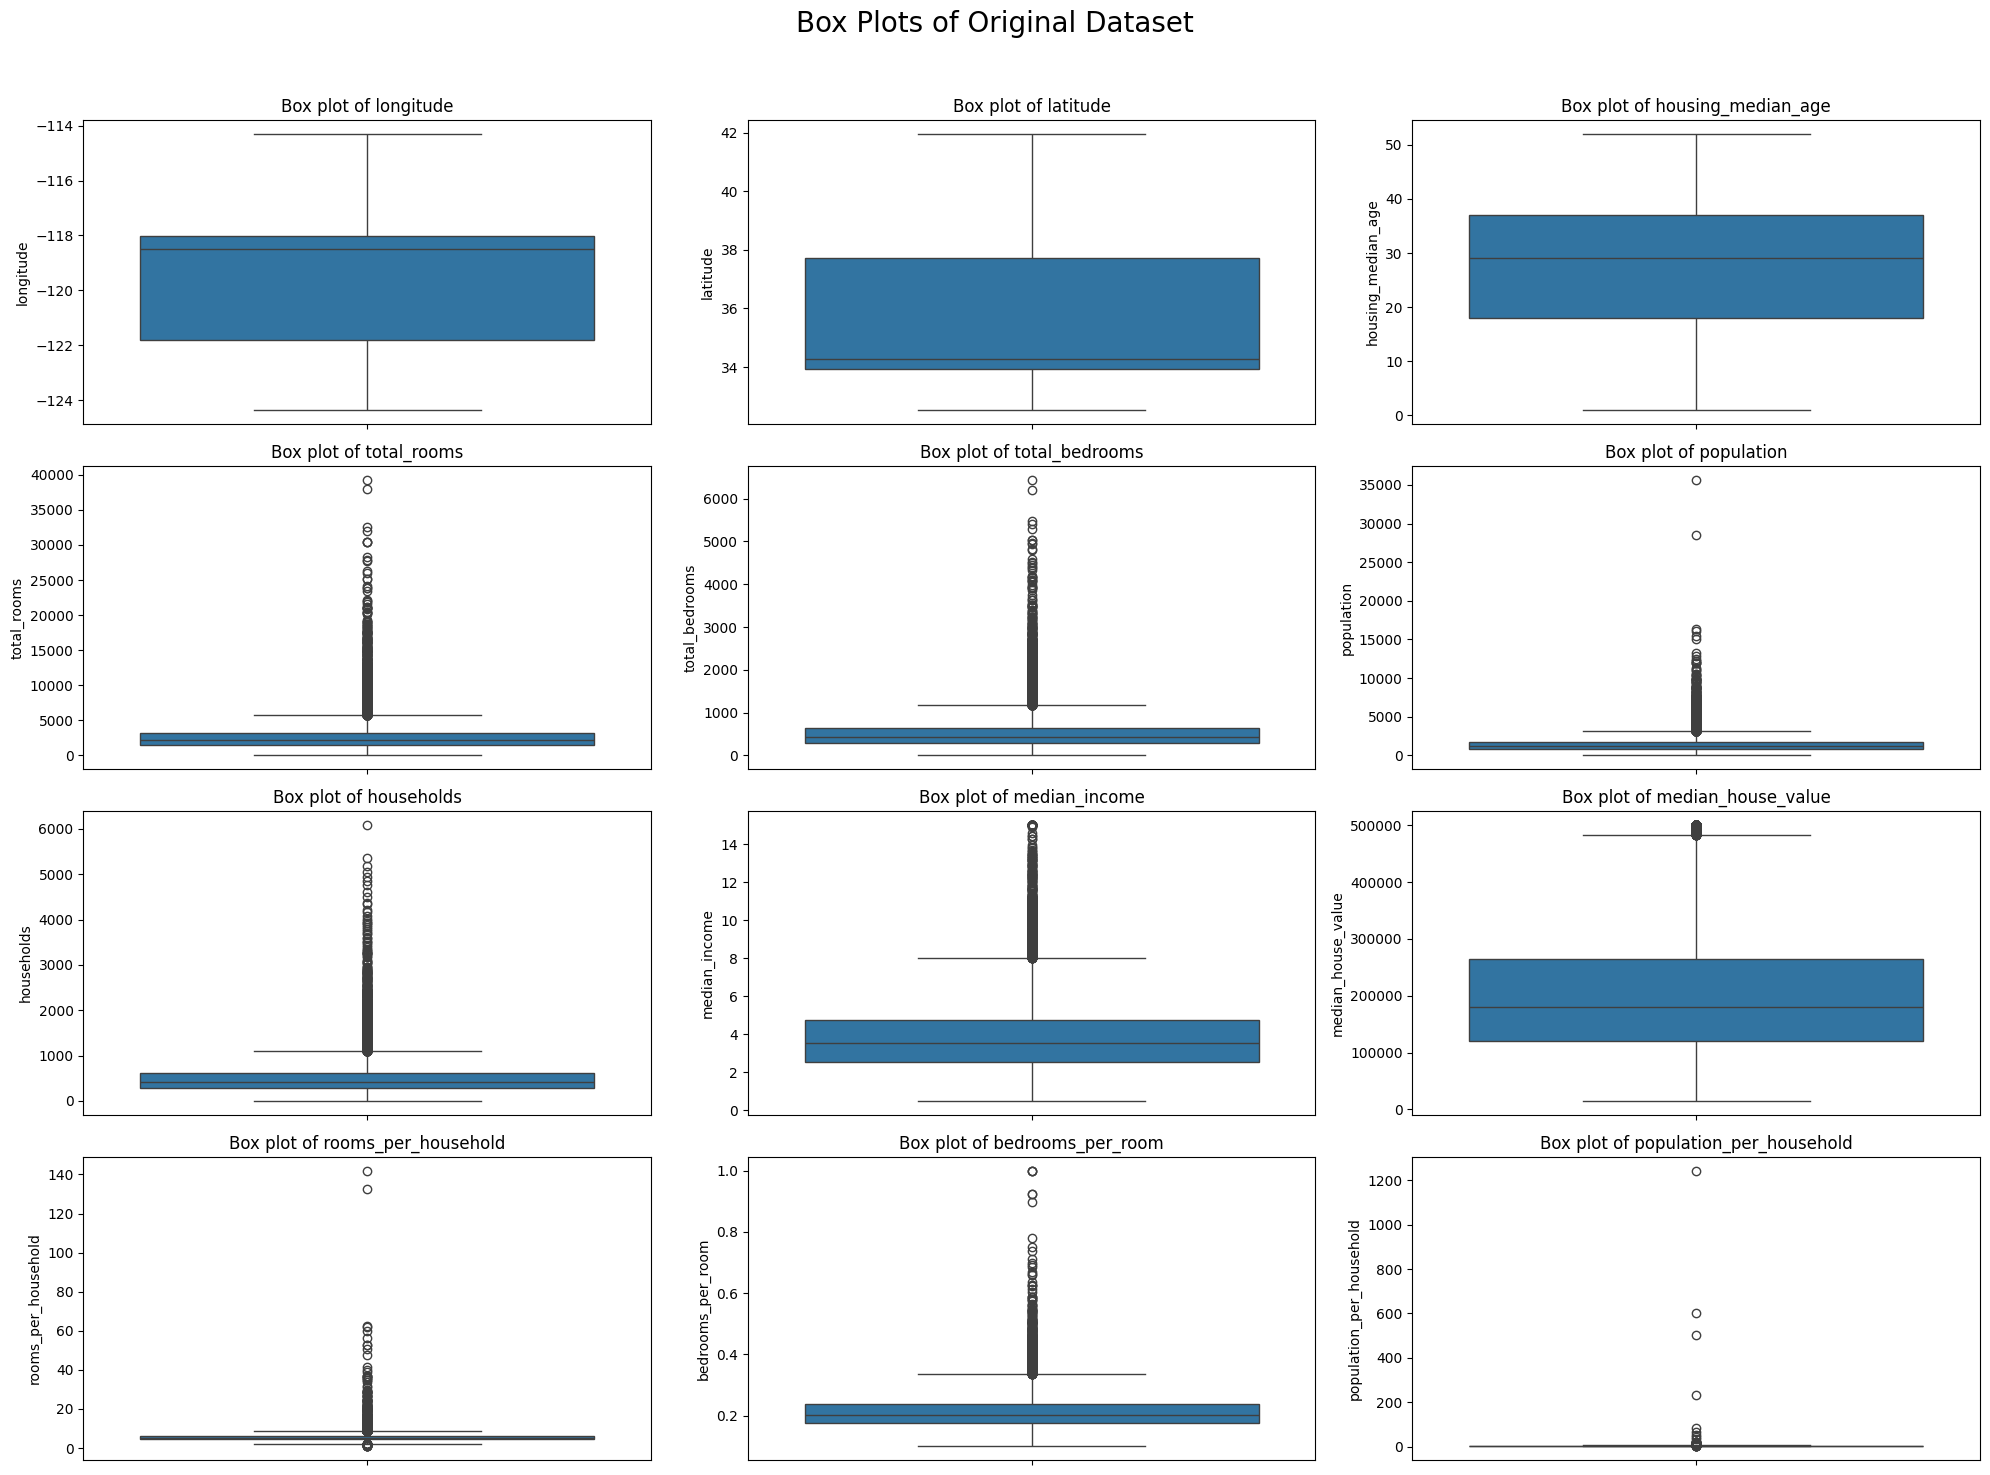

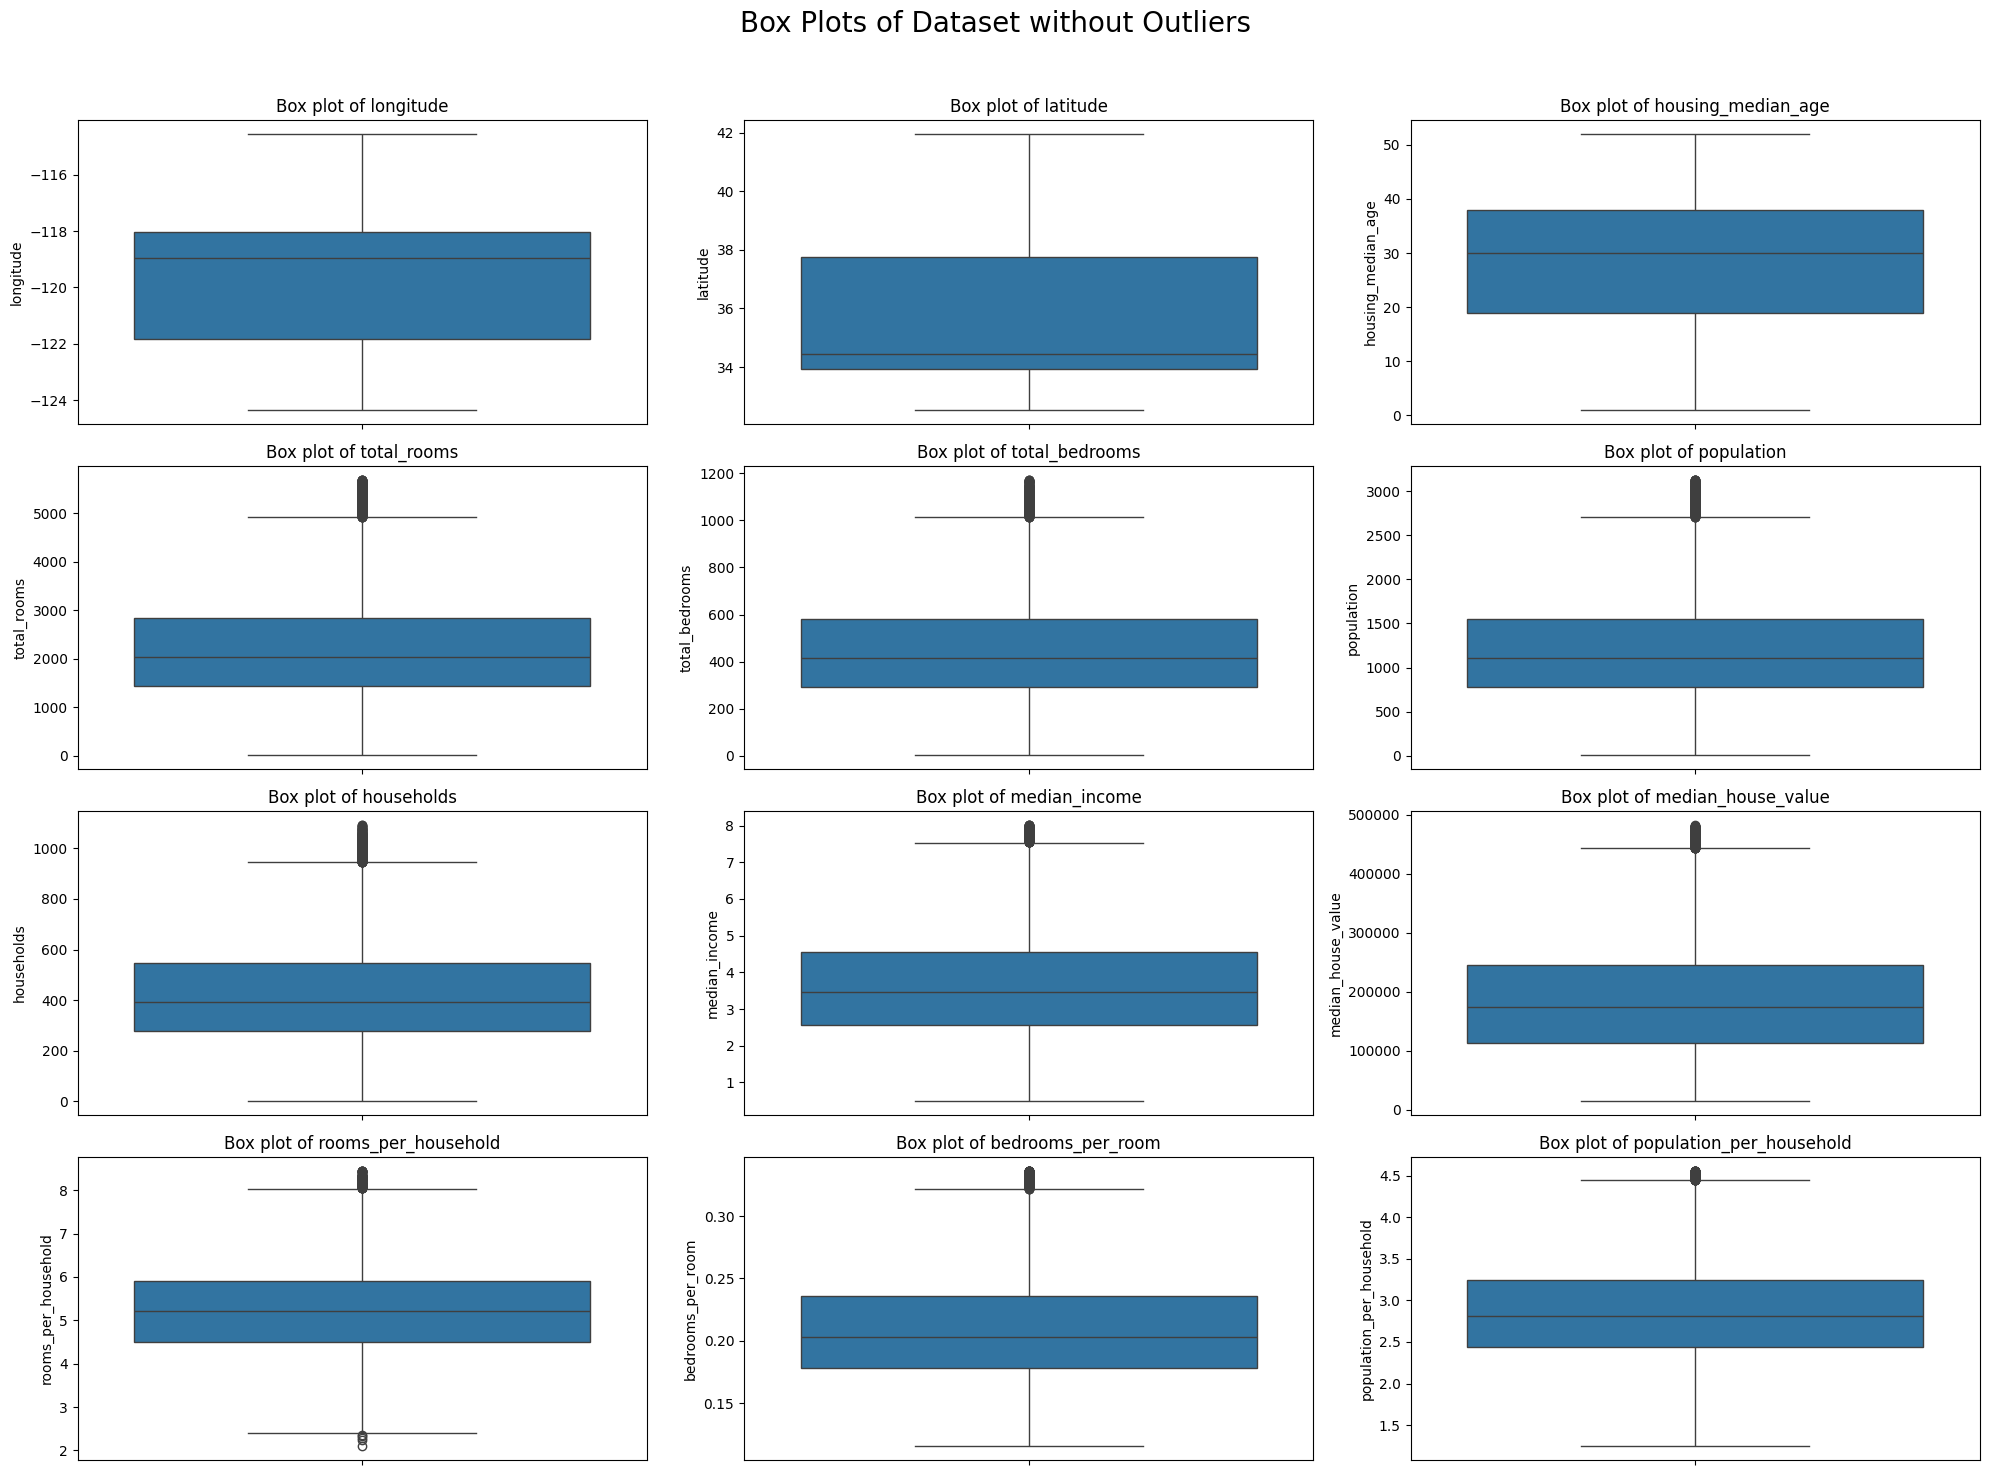

In [ ]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from the dataset
housing_no_outliers = remove_outliers(housing)

# Display the dataset without outliers
housing_no_outliers

# Compare the size of the dataset before and after removing outliers
print("Original dataset size:", housing.shape)
print("Dataset size after removing outliers:", housing_no_outliers.shape)

# Plot box plots for the original dataset
plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Original Dataset', fontsize=20)
for i, column in enumerate(housing.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=housing, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot box plots for the dataset without outliers
plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Dataset without Outliers', fontsize=20)
for i, column in enumerate(housing_no_outliers.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=housing_no_outliers, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Q1) Remove Outliers and Compare Dataset Sizes?**

**Q2) What is the main reason for analyzing the outliers?**

**Q3) Find the all missing null values using two different methods in dataset ?**

**Q4) Explore whether we can merge "zomato.csv" and "country_code.xlsx" if yes then show the whole file in the csv format?**

**Q5) Find top 3 countries which uses zomato and plot it using piechart?**

**Q6) Use features like Aggregate Rating, Rating color, Rating text and try to findout the count present for each rating of the restaurants.**





# **Let's do some class Assignment**

Dataset Link - https://drive.google.com/file/d/10CVjDdS0NAZHKRfoPb5zsgXITD7qoYld/view?usp=sharing